In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.patches import Ellipse
import matplotlib.patches as patches
import librosa

%run graphing_function_recent.ipynb

In [2]:
#Use this for all adjustable values 
#input file paths here (include .csv):
video_path = r'\\10.25.16.5\yaochen\Active\DLC\Final_Models\Lindsey\escape_behavior_2-lindsey_christinger-2024-06-13_v1\D1D2\coords_csv\CoordD1_M4_P2_7_18_24_videoDLC_resnet50_escape_behavior_2Jun13shuffle1_1030000_filtered_day.csv'
time_path = r'\\10.25.16.5\yaochen\Active\Lindsey\set_up_testing\D1D2\D1\video_time\D1_M4_P2_7_18_24_video_time0.csv'
audio_path = r'\\10.25.16.5\yaochen\Active\Lindsey\set_up_testing\D1D2\D1\stimulus_time\D1_M4_P2_7_18_24_stimulus_time0.csv'

north_pixel = 96
south_pixel = 414
east_pixel = 487
west_pixel = 146
shelter_x_pixel = 331
shelter_y_pixel = 389

#estimate for when mouse reaches shelter
escape_done = 7.5 #time mouse reaches shelter location

In [3]:
#manually decide?
escape_response = True
freezing_response = False
##small_angle = 

In [4]:
#read in DLC data, convert to cm, center platform at 0,0
shelter_x, shelter_y, x_diam, y_diam, coord_scaled = single_mouse_data(north_pixel, south_pixel, east_pixel, west_pixel, shelter_x_pixel, shelter_y_pixel, video_path)

In [5]:
#replace any head, nose, or center points with likelihood < .9 with NA
filter_data(.8, coord_scaled)

In [6]:
#coord_filtered

In [7]:
timestamp_df = convert_time(time_path, coord_scaled, audio_path, 1)

In [8]:
coord_scaled.tail()

,Unnamed: 0,frames,nose_x,nose_y,nose_likelihood,head_x,head_y,head_likelihood,earRight_x,earRight_y,...,center_x,center_y,center_likelihood,spine2_x,spine2_y,spine2_likelihood,spine3_x,spine3_y,spine3_likelihood,time_set
14058,14058,14058,8.911177,19.344072,0.999825,10.660422,19.816021,0.999962,10.715275,18.992474,...,12.894734,19.967078,0.999970,14.052398,20.326197,0.999946,15.406743,20.732740,0.999966,180.817357
14059,14059,14059,8.908464,19.342760,0.999824,10.660422,19.809558,0.999959,10.712480,18.991497,...,12.899096,19.967078,0.999969,14.058446,20.326197,0.999947,15.412514,20.753615,0.999966,180.855757
14060,14060,14060,8.915681,19.334758,0.999819,10.665941,19.807632,0.999963,10.715275,18.991497,...,12.902508,19.967078,0.999972,14.062590,20.328779,0.999948,15.416302,20.756209,0.999967,180.895501
14061,14061,14061,8.899413,19.333517,0.999818,10.660422,19.804992,0.999963,10.712480,18.981287,...,12.899096,19.961546,0.999969,14.062590,20.328779,0.999950,15.416302,20.756209,0.999969,180.935501
14062,14062,14062,8.883794,19.299523,0.999747,10.631041,19.803857,0.999939,10.712480,18.976739,...,12.899096,19.961546,0.999958,14.062590,20.328779,0.999956,15.403604,20.756209,0.999959,180.975488


In [9]:
#REPLACE ONCE WE HAVE STIMULUS TIMESTAMPS
#returns start and stop times of stimulus.
#start, stimulus_end = audio_timing(stimulus_start, stimulus_end, audio_path, coord_scaled['time'].iloc[-1])

In [10]:
#find time stimulus ends and mouse reaches shelter(escape) if stimulus is set to 0s
#end, escape = time_set_zero(start, stimulus_end, escape_done, coord_scaled)

In [11]:
#calculate displacement as 'displacement'
displacement(shelter_x, shelter_y, coord_scaled)

In [12]:
#calculate speed as 'speed' and change in displacement as 'delta_vector'
total_distance = speed(coord_scaled)

In [13]:
#calculate head angle as 'head_angle'
angle(shelter_x, shelter_y, coord_scaled)

In [14]:
#calculate head angle speed as 'angle_speed'
angle_speed(coord_scaled)

In [15]:
#create dataframes isolated to 4 ranges: just shelter reaching, 3 seconds before and 6 after, 2 before and 4 after, and 1 where you can input your own parameters
#return 4 dataframes 
escape_only, four_second, six_second, long_range, escape_estimate = dataframe_ranges(-7, 14, escape_done,coord_scaled)

In [16]:
long_range

,Unnamed: 0,frames,nose_x,nose_y,nose_likelihood,head_x,head_y,head_likelihood,earRight_x,earRight_y,...,spine2_likelihood,spine3_x,spine3_y,spine3_likelihood,time_set,displacement,speed,delta_vector,head_angle,angle_speed
9364,9364,9364,-0.392584,28.849096,0.987674,-1.323682,28.196492,0.999863,-2.038181,28.608104,...,0.999900,-4.212678,23.775855,0.999896,-6.991590,5.421581,0.161740,0.006470,1.177898,0.160398
9365,9365,9365,-0.363847,28.849096,0.990523,-1.329086,28.196492,0.999906,-2.040278,28.608104,...,0.999916,-4.225338,23.777628,0.999891,-6.951590,5.421581,0.000000,0.000000,1.160454,-0.436079
9366,9366,9366,-0.363847,28.849096,0.989000,-1.305535,28.199173,0.999864,-2.010220,28.608104,...,0.999909,-4.202797,23.777628,0.999889,-6.910912,5.402741,0.467873,0.019032,1.173259,0.314773
9367,9367,9367,-0.378620,28.845782,0.986579,-1.307512,28.206297,0.999894,-2.015581,28.614227,...,0.999928,-4.202797,23.776651,0.999907,-6.870413,5.405276,0.368260,0.014914,1.173152,-0.002644
9368,9368,9368,-0.363847,28.840578,0.986386,-1.307512,28.206297,0.999874,-2.015581,28.614227,...,0.999920,-4.216112,23.776651,0.999896,-6.831347,5.405276,0.000000,0.000000,1.162014,-0.285097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9884,9884,9884,1.757171,24.599963,0.999552,0.450533,24.921664,0.999975,0.427015,25.935799,...,0.999964,-4.690633,24.275119,0.999960,13.813619,4.653889,0.000000,0.000000,0.591556,-0.103515
9885,9885,9885,1.732321,24.599963,0.999544,0.450533,24.939782,0.999979,0.398207,25.942426,...,0.999957,-4.695813,24.268586,0.999951,13.853901,4.665036,0.281618,0.011344,0.601825,0.254928
9886,9886,9886,1.699910,24.664990,0.999565,0.386896,24.939923,0.999981,0.368438,25.955252,...,0.999957,-4.756033,24.268586,0.999959,13.893658,4.744396,1.998373,0.079449,0.539870,-1.558333
9887,9887,9887,1.699910,24.614704,0.999686,0.386896,24.939782,0.999987,0.368438,25.942426,...,0.999952,-4.756033,24.239287,0.999957,13.935014,4.774790,0.761460,0.031491,0.576220,0.878945


<module 'matplotlib.pyplot' from 'C:\\anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

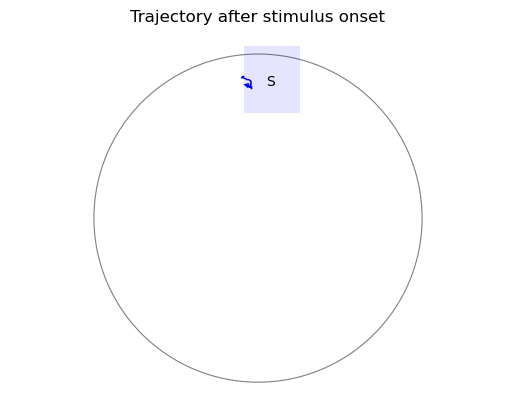

In [17]:
trajectory(shelter_x, shelter_y, x_diam, y_diam, escape_estimate)

<module 'matplotlib.pyplot' from 'C:\\anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

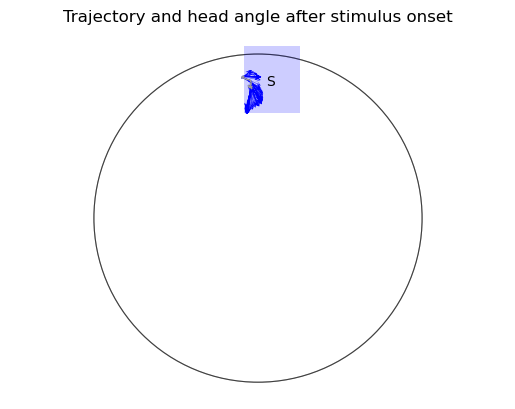

In [18]:
head_angle_trajectory_figure(shelter_x, shelter_y, x_diam, y_diam, escape_estimate)

In [19]:
escape_only

,Unnamed: 0,frames,nose_x,nose_y,nose_likelihood,head_x,head_y,head_likelihood,earRight_x,earRight_y,...,spine2_likelihood,spine3_x,spine3_y,spine3_likelihood,time_set,displacement,speed,delta_vector,head_angle,angle_speed
9539,9539,9539,-0.763949,28.967592,0.938367,-1.653797,28.257625,0.999770,-2.319814,28.533600,...,0.999898,-4.235181,23.683607,0.999828,0.013235,5.552172,0.108594,0.004677,1.214652,-0.069207
9540,9540,9540,-0.763949,28.967750,0.924045,-1.634035,28.257625,0.999783,-2.280082,28.533600,...,0.999923,-4.236098,23.683607,0.999860,0.050202,5.544077,0.219447,0.008112,1.227798,0.355611
9541,9541,9541,-0.784131,28.967592,0.970304,-1.634035,28.257625,0.999861,-2.273684,28.540455,...,0.999908,-4.257645,23.683607,0.999856,0.090842,5.544077,0.000000,0.000000,1.239211,0.280834
9542,9542,9542,-0.739459,28.959016,0.975794,-1.616030,28.248885,0.999843,-2.270447,28.543728,...,0.999950,-4.265954,23.680300,0.999869,0.130214,5.543813,0.103782,0.004086,1.224538,-0.372675
9543,9543,9543,-0.733476,28.959016,0.937476,-1.585634,28.246069,0.999836,-2.259769,28.545209,...,0.999895,-4.267548,23.680300,0.999859,0.170189,5.557203,0.335675,0.013419,1.243061,0.463365
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9598,9598,9598,2.034688,23.004268,0.999171,0.972532,24.859366,0.999979,1.592829,25.515090,...,0.999994,-4.283511,24.452191,0.999956,2.370842,3.979331,0.210439,0.008431,1.531266,1.278058
9599,9599,9599,2.022634,22.990330,0.999430,0.974607,24.821818,0.999987,1.599331,25.428533,...,0.999993,-4.283511,24.469331,0.999965,2.410893,3.976686,0.658188,0.026361,1.550093,0.470083
9600,9600,9600,2.008899,22.930724,0.999479,1.008470,24.742924,0.999990,1.665660,25.367815,...,0.999993,-4.281998,24.469331,0.999961,2.451584,3.926908,1.225701,0.049875,1.611541,1.510120
9601,9601,9601,1.920378,22.915919,0.999318,1.030847,24.693563,0.999991,1.694631,25.292316,...,0.999992,-4.283511,24.508079,0.999950,2.491046,3.925200,0.043734,0.001726,1.680904,1.757712


<module 'matplotlib.pyplot' from 'C:\\anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

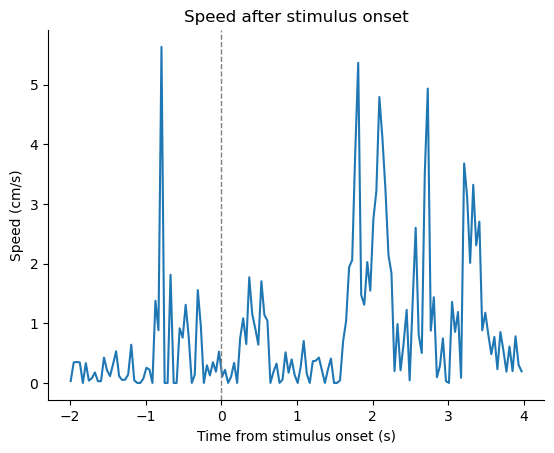

In [20]:
speed_figure(four_second['time_set'].iloc[-1],4, four_second)

<module 'matplotlib.pyplot' from 'C:\\anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

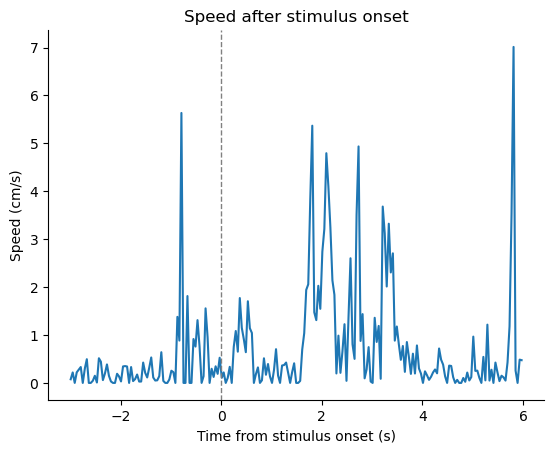

In [21]:
speed_figure(six_second['time_set'].iloc[-1],4, six_second)


<module 'matplotlib.pyplot' from 'C:\\anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

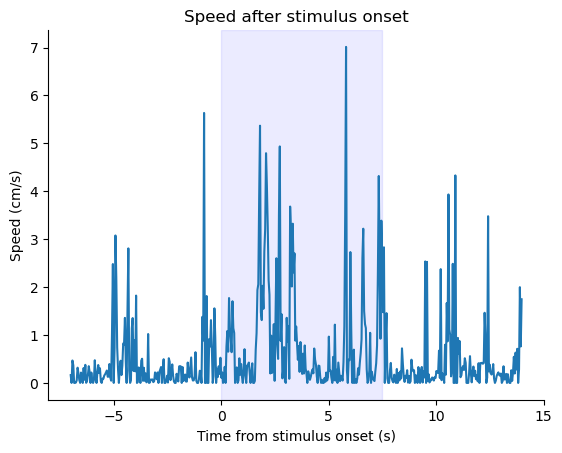

In [22]:
speed_figure(7.5,9, long_range)

<module 'matplotlib.pyplot' from 'C:\\anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

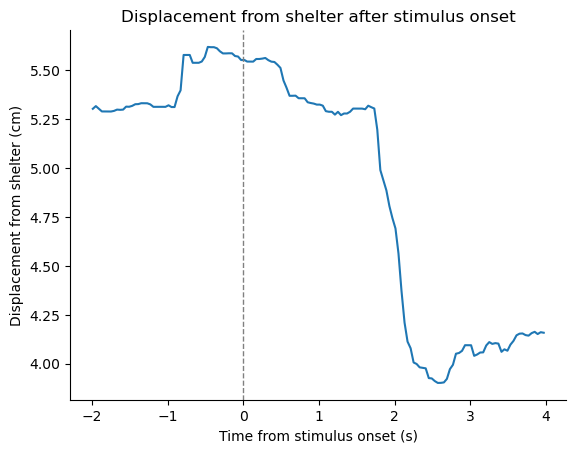

In [23]:
displacement_figure(four_second['time_set'].iloc[-1],4, four_second)

<module 'matplotlib.pyplot' from 'C:\\anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

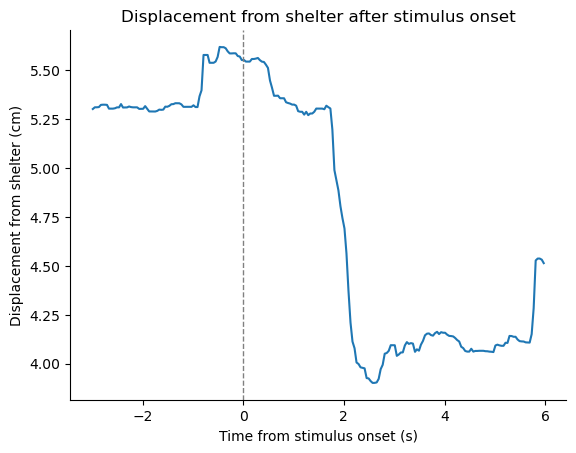

In [24]:
displacement_figure(six_second['time_set'].iloc[-1],4, six_second)

<module 'matplotlib.pyplot' from 'C:\\anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

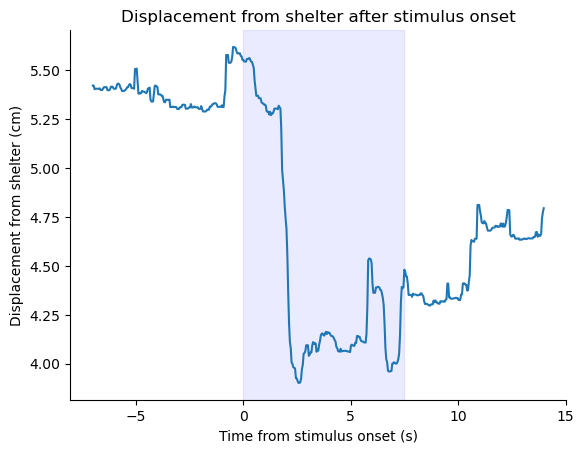

In [25]:
displacement_figure(7.5,9, long_range)

<module 'matplotlib.pyplot' from 'C:\\anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

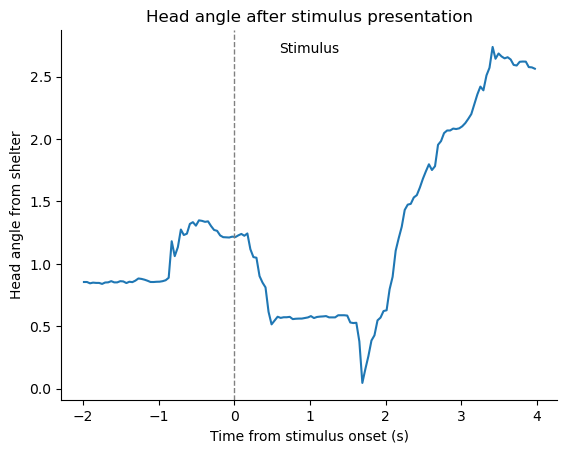

In [26]:
head_angle_figure(four_second['time_set'].iloc[-1],4, four_second)

<module 'matplotlib.pyplot' from 'C:\\anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

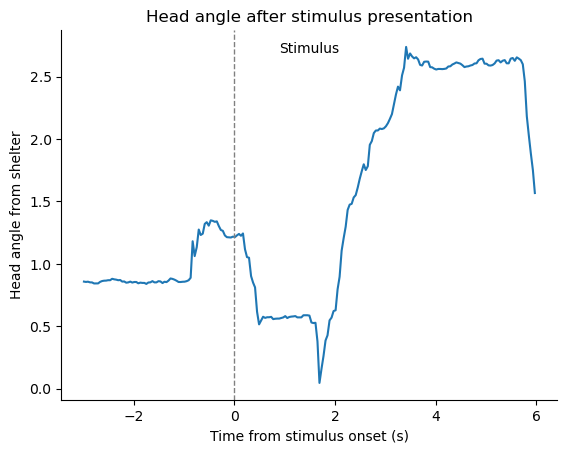

In [27]:
head_angle_figure(six_second['time_set'].iloc[-1],4, six_second)

<module 'matplotlib.pyplot' from 'C:\\anaconda\\lib\\site-packages\\matplotlib\\pyplot.py'>

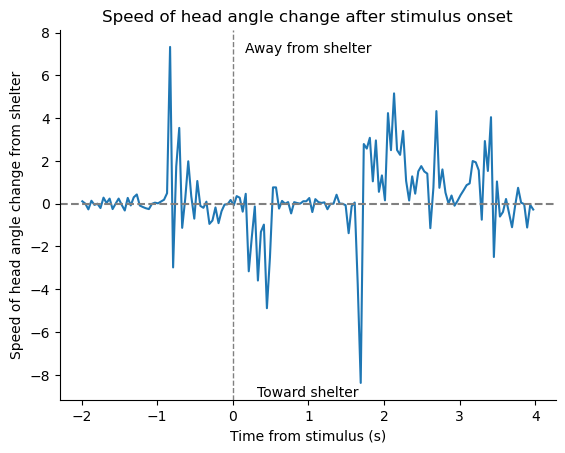

In [28]:
angle_speed_figure(four_second['time_set'].iloc[-1], 4,four_second)

In [29]:
ratio, initial_displacement, total_distance = linearity_ratio(escape_only)

In [30]:
#shelter_rotation(shelter_x, shelter_y, escape_only)

In [31]:
escape_only

,Unnamed: 0,frames,nose_x,nose_y,nose_likelihood,head_x,head_y,head_likelihood,earRight_x,earRight_y,...,spine2_likelihood,spine3_x,spine3_y,spine3_likelihood,time_set,displacement,speed,delta_vector,head_angle,angle_speed
9539,9539,9539,-0.763949,28.967592,0.938367,-1.653797,28.257625,0.999770,-2.319814,28.533600,...,0.999898,-4.235181,23.683607,0.999828,0.013235,5.552172,0.108594,0.004677,1.214652,-0.069207
9540,9540,9540,-0.763949,28.967750,0.924045,-1.634035,28.257625,0.999783,-2.280082,28.533600,...,0.999923,-4.236098,23.683607,0.999860,0.050202,5.544077,0.219447,0.008112,1.227798,0.355611
9541,9541,9541,-0.784131,28.967592,0.970304,-1.634035,28.257625,0.999861,-2.273684,28.540455,...,0.999908,-4.257645,23.683607,0.999856,0.090842,5.544077,0.000000,0.000000,1.239211,0.280834
9542,9542,9542,-0.739459,28.959016,0.975794,-1.616030,28.248885,0.999843,-2.270447,28.543728,...,0.999950,-4.265954,23.680300,0.999869,0.130214,5.543813,0.103782,0.004086,1.224538,-0.372675
9543,9543,9543,-0.733476,28.959016,0.937476,-1.585634,28.246069,0.999836,-2.259769,28.545209,...,0.999895,-4.267548,23.680300,0.999859,0.170189,5.557203,0.335675,0.013419,1.243061,0.463365
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9598,9598,9598,2.034688,23.004268,0.999171,0.972532,24.859366,0.999979,1.592829,25.515090,...,0.999994,-4.283511,24.452191,0.999956,2.370842,3.979331,0.210439,0.008431,1.531266,1.278058
9599,9599,9599,2.022634,22.990330,0.999430,0.974607,24.821818,0.999987,1.599331,25.428533,...,0.999993,-4.283511,24.469331,0.999965,2.410893,3.976686,0.658188,0.026361,1.550093,0.470083
9600,9600,9600,2.008899,22.930724,0.999479,1.008470,24.742924,0.999990,1.665660,25.367815,...,0.999993,-4.281998,24.469331,0.999961,2.451584,3.926908,1.225701,0.049875,1.611541,1.510120
9601,9601,9601,1.920378,22.915919,0.999318,1.030847,24.693563,0.999991,1.694631,25.292316,...,0.999992,-4.283511,24.508079,0.999950,2.491046,3.925200,0.043734,0.001726,1.680904,1.757712


In [32]:
likelihood_data, likelihood_minus_nose, likelihood_center = likelihood_check(0, 8, .9, coord_scaled)

In [33]:
likelihood_data #need to adjust time frame to be useful 

,Unnamed: 0,frames,nose_x,nose_y,nose_likelihood,head_x,head_y,head_likelihood,earRight_x,earRight_y,...,spine2_likelihood,spine3_x,spine3_y,spine3_likelihood,time_set,displacement,speed,delta_vector,head_angle,angle_speed


In [34]:
rotate, shelter_rotate_x, shelter_rotate_y = rotate_trajectory(shelter_x, shelter_y, escape_only)
normalized_df, shelter_normalized_x, shelter_normalized_y, combined_range = normalize_rotation(rotate, shelter_rotate_x, shelter_rotate_y)

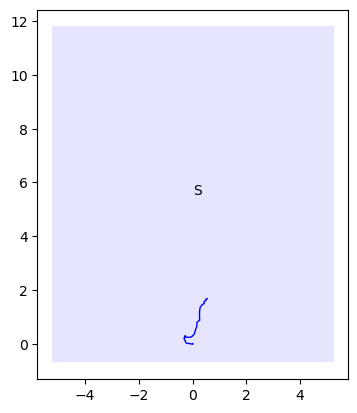

In [35]:
fig = plt.figure()  #create figure to fill in
ax = plt.axes()
    
    #make x and y scales equal - present as a circle


    #plot the center x and y coordinates
x = rotate['rotated_x']
y = rotate['rotated_y']

ax.text(shelter_rotate_x,shelter_rotate_y, 'S', color = 'black', size = 10)
shelter = patches.Rectangle(((shelter_rotate_x - 5.25), (shelter_rotate_y-6.25)), 10.5,12.5,  linewidth = .8, edgecolor = 'none', facecolor = 'blue', alpha = .1)
ax.add_patch(shelter)

ax.set_aspect('equal')
ax.plot(x,y, color = 'blue', linewidth = 1)


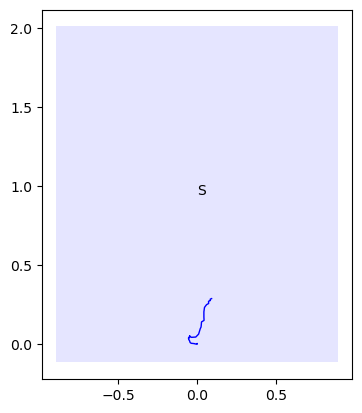

In [36]:

fig = plt.figure()  #create figure to fill in
ax = plt.axes()
    
x = normalized_df['x']
y = normalized_df['y']

ax.text(shelter_normalized_x,shelter_normalized_y, 'S', color = 'black', size = 10)
shelter = patches.Rectangle(((shelter_normalized_x - 5.25/combined_range), (shelter_normalized_y-6.25/combined_range)), 10.5/combined_range,12.5/combined_range,  linewidth = .8, edgecolor = 'none', facecolor = 'blue', alpha = .1)
ax.add_patch(shelter)

ax.set_aspect('equal')
ax.plot(x,y, color = 'blue', linewidth = 1)
    

